In [19]:
import pandas as pd

from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Load processed data
df = pd.read_csv("../data/processed/chicago_crime_clean.csv")

X = df[["latitude", "longitude"]]

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [25]:
dbscan = DBSCAN(
    eps=0.1,
    min_samples=20
)

df["dbscan_cluster"] = dbscan.fit_predict(X_scaled)

In [26]:
df["dbscan_cluster"].value_counts()

dbscan_cluster
 0    3350
-1    1396
 1      44
 2      37
 4      34
 5      33
 3      24
 6      24
 7      21
 8      21
Name: count, dtype: int64

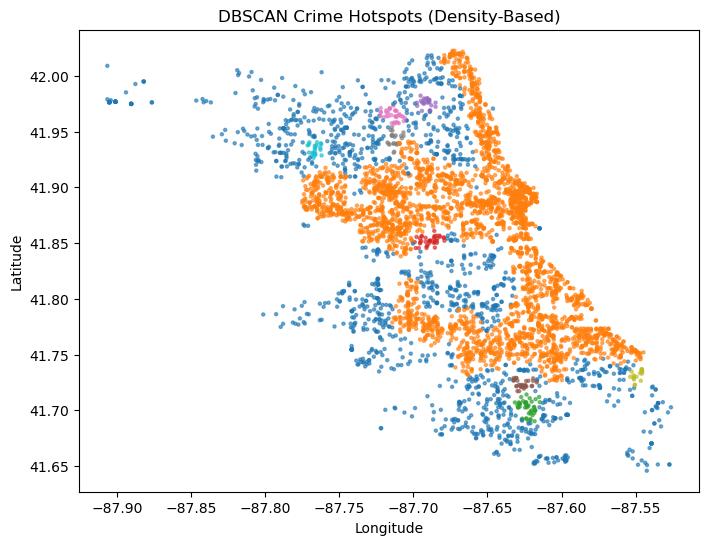

In [27]:
plt.figure(figsize=(8, 6))

plt.scatter(
    df["longitude"],
    df["latitude"],
    c=df["dbscan_cluster"],
    cmap="tab10",
    s=5,
    alpha=0.6
)

plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("DBSCAN Crime Hotspots (Density-Based)")
plt.show()